In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("c:\\Users\\suehring\\Downloads\\cyber_lab_dataset.csv")
df.head()

,Flow_Duration,Protocol,Src_IP,Dst_IP,Total_Fwd_Packets,Total_Backward_Packets,Label
0,7840,UDP,10.182.19.172,10.208.180.150,9,7,Normal
1,24066,TCP,172.16.150.36,10.35.179.210,10,11,Normal
2,14061,UDP,172.18.131.161,41.149.86.179,7,7,Normal
3,15531,TCP,10.250.182.107,226.119.189.21,24,1,Attack
4,23235,TCP,172.21.26.27,109.115.177.8,18,9,Normal


In [4]:
df.shape

(10000, 7)

In [5]:
df.columns

Index(['Flow_Duration', 'Protocol', 'Src_IP', 'Dst_IP', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Label'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Flow_Duration           10000 non-null  int64 
 1   Protocol                10000 non-null  object
 2   Src_IP                  10000 non-null  object
 3   Dst_IP                  10000 non-null  object
 4   Total_Fwd_Packets       10000 non-null  int64 
 5   Total_Backward_Packets  10000 non-null  int64 
 6   Label                   10000 non-null  object
dtypes: int64(3), object(4)
memory usage: 547.0+ KB


In [7]:
df.describe()

,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets
count,10000.000000,10000.000000,10000.000000
mean,20514.783600,11.962500,9.607300
std,11105.383033,9.330338,7.481249
min,963.000000,1.000000,0.000000
25%,12643.000000,7.000000,5.000000
50%,18275.000000,10.000000,8.000000
75%,25778.750000,14.000000,12.000000
max,87527.000000,95.000000,78.000000


In [8]:
df_tcp = df[df['Protocol'] == 'TCP']

In [9]:
df_tcp.shape

(7058, 7)

In [13]:
long_flows = df[df['Flow_Duration'] > 10000]
long_flows.shape

(8631, 7)

In [14]:
attack_rate_tcp = (df_tcp['Label'] == 'Attack').mean()
attack_rate_tcp

np.float64(0.08415981864550864)

In [17]:
attack_rate_long = (long_flows['Label'] == 'Attack').mean()
attack_rate_long

np.float64(0.09303672807322443)

In [18]:
df['packets_total'] = df['Total_Fwd_Packets'] + df['Total_Backward_Packets']
df.groupby('Label')['packets_total'].mean()

Label
Attack    59.064477
Normal    18.211702
Name: packets_total, dtype: float64

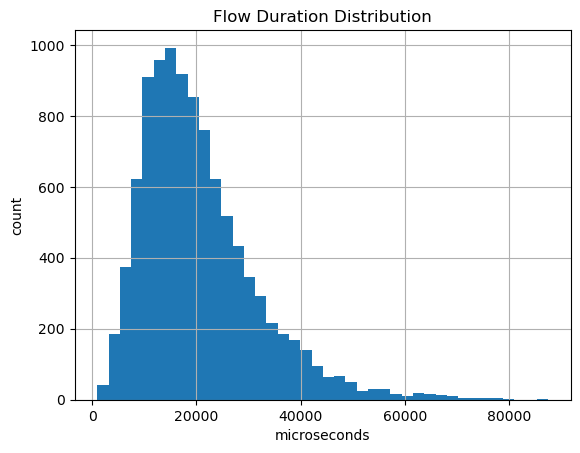

In [21]:
plt.figure()
df['Flow_Duration'].hist(bins=40)
plt.title("Flow Duration Distribution")
plt.xlabel("microseconds")
plt.ylabel("count")
plt.show()

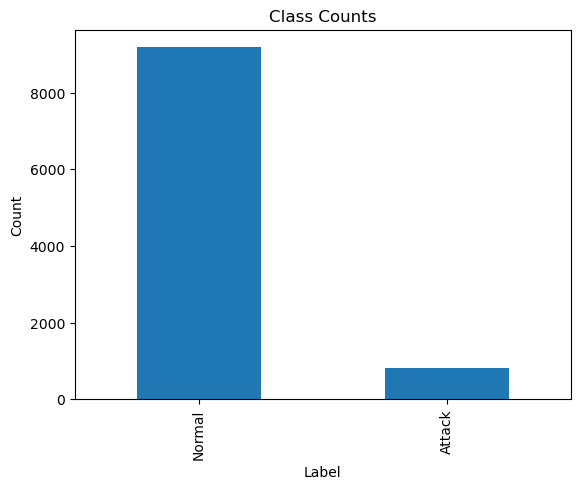

In [23]:
plt.figure()
df['Label'].value_counts().plot(kind='bar')
plt.title("Class Counts")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

<Figure size 640x480 with 0 Axes>

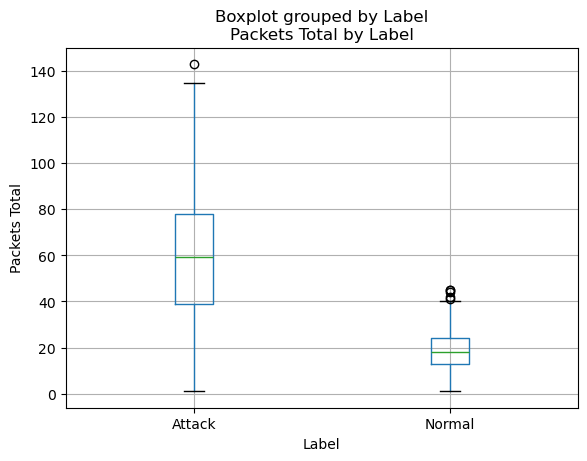

In [24]:
plt.figure()
df.boxplot(column='packets_total', by='Label')
plt.title("Packets Total by Label")
plt.xlabel("Label")
plt.ylabel("Packets Total")
plt.show()